### Logistic Regression - Diabetes Data

In [64]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### 1. Problem Statement

### 2. Data Gathering

In [65]:
df = pd.read_csv('diabetes.csv')
df.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [66]:
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


### 3. EDA and Feature Engineering

In [68]:
df.isna().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


##### Target Column

In [70]:
df['Outcome']

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [71]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

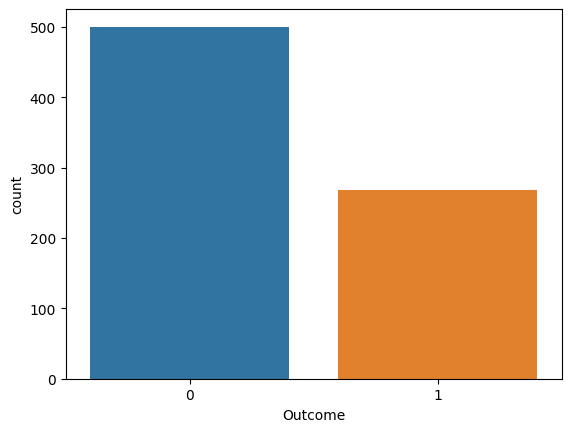

In [72]:
sns.countplot(x = df['Outcome'])

### 4. Model Training 

##### Train Test Split

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=1,stratify=y)
y_train.value_counts()

Outcome
0    400
1    214
Name: count, dtype: int64

In [76]:
y_train.value_counts()

Outcome
0    400
1    214
Name: count, dtype: int64

### Logistic Regression

In [77]:
logistic_clf = LogisticRegression()
logistic_clf.fit(x_train, y_train)

LogisticRegression()

#### Model Evaluation

In [78]:
logistic_clf.score(x_train,y_train) # accuracy

0.7915309446254072

In [79]:
logistic_clf.score(x_test,y_test)

0.7402597402597403

In [80]:
y_pred = logistic_clf.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
      dtype=int64)

In [81]:
y_pred[30:35]

array([0, 0, 0, 0, 1], dtype=int64)

In [82]:
y_test[30:35]

6      1
342    0
9      1
318    0
427    1
Name: Outcome, dtype: int64

In [83]:
y_test.value_counts()

Outcome
0    100
1     54
Name: count, dtype: int64

In [84]:
confusion_matrix(y_test, y_pred)

array([[86, 14],
       [26, 28]], dtype=int64)

In [85]:
clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Classification Report :
               precision    recall  f1-score   support

           0       0.77      0.86      0.81       100
           1       0.67      0.52      0.58        54

    accuracy                           0.74       154
   macro avg       0.72      0.69      0.70       154
weighted avg       0.73      0.74      0.73       154



In [86]:
# Evaluation on Testing Data

y_pred = logistic_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("#"*50)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)
print("#"*50)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :\n",accuracy)
print("#"*50)


Confusion Matrix :
 [[86 14]
 [26 28]]
##################################################
Classification Report :
               precision    recall  f1-score   support

           0       0.77      0.86      0.81       100
           1       0.67      0.52      0.58        54

    accuracy                           0.74       154
   macro avg       0.72      0.69      0.70       154
weighted avg       0.73      0.74      0.73       154

##################################################
Accuracy :
 0.7402597402597403
##################################################


In [87]:
# Evaluation on Training Data

y_pred_train = logistic_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("#"*50)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)
print("#"*50)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :\n",accuracy)
print("#"*50)

Confusion Matrix :
 [[359  41]
 [ 87 127]]
##################################################
Classification Report :
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       400
           1       0.76      0.59      0.66       214

    accuracy                           0.79       614
   macro avg       0.78      0.75      0.76       614
weighted avg       0.79      0.79      0.78       614

##################################################
Accuracy :
 0.7915309446254072
##################################################


### ROC Curve

In [55]:
logistic_clf.predict_proba(x_train)

array([[0.68127273, 0.31872727],
       [0.18556568, 0.81443432],
       [0.86075534, 0.13924466],
       ...,
       [0.44005473, 0.55994527],
       [0.52849612, 0.47150388],
       [0.03185441, 0.96814559]])

In [56]:
logistic_clf.predict_proba(x_train).shape

(614, 2)

In [57]:
y_pred_train_prob = logistic_clf.predict_proba(x_train)
y_pred_train_prob

array([[0.68127273, 0.31872727],
       [0.18556568, 0.81443432],
       [0.86075534, 0.13924466],
       ...,
       [0.44005473, 0.55994527],
       [0.52849612, 0.47150388],
       [0.03185441, 0.96814559]])

NameError: name 'fpr' is not defined

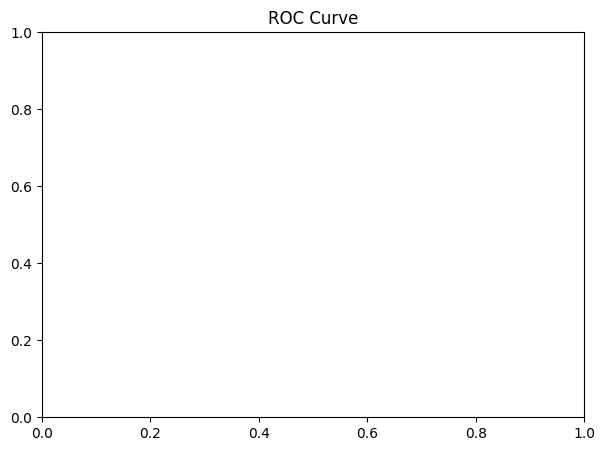

In [88]:
plt.figure(figsize=(7,5))
plt.title("ROC Curve")
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.savefig("ROC_Curve.png")

In [ ]:
import plotly.express as px

In [ ]:
px.scatter(x = fpr,y = tpr)

In [ ]:
x = 0.9158

In [ ]:
tpr
np.where(tpr> x)

In [ ]:
tpr[153]

In [ ]:
fpr[153]

In [ ]:
thresh[153]

In [ ]:
y_pred_train_prob[:,1][78]

In [ ]:
# y_pred_train_prob[:,1]

def get_pred_class(threshold, pred_prob):
    print("Predicted prob is :",pred_prob)
    if pred_prob >= threshold:
        return "Class1"
    
    else:
        return "Class0"

threshold = thresh[153] # 0.199

pred_class = get_pred_class(threshold, y_pred_train_prob[:,1][200])
print("Predicted Class is :",pred_class)

### Prediction on Single Row

In [ ]:
x_test[25:26]

In [ ]:
logistic_clf.classes_

In [ ]:
logistic_clf.coef_

In [ ]:
logistic_clf.n_features_in_

In [63]:
Glucose = 120
BloodPressure = 90
SkinThickness = 32
Insulin = 0
BMI = 35.34
DiabetesPedigreeFunction = 0.867
Age = 42

test_array = np.array([Glucose,BloodPressure,SkinThickness,Insulin, BMI, DiabetesPedigreeFunction,
                      Age],ndmin=2)

pred_class = logistic_clf.predict(test_array)[0]
pred_class

test_array

array([[120.   ,  90.   ,  32.   ,   0.   ,  35.34 ,   0.867,  42.   ]])

In [ ]:
def get_pred_class(threshold, pred_prob):
    print("Predicted prob is :",pred_prob)
    if pred_prob >= threshold:
        return "Class1"
    
    else:
        return "Class0"

threshold = thresh[153] # 0.199

pred_prob = logistic_clf.predict_proba(test_array)[0,1]

pred_class = get_pred_class(threshold, pred_prob)
print("Predicted Class is :",pred_class)

In [ ]:
df

In [ ]:
sns.scatterplot(x = df['Glucose'], y = df['BloodPressure'], hue = df['Outcome'])

In [ ]:
with open('logistic_clf.pkl','wb') as f:
    pickle.dump(logistic_clf, f)

In [ ]:
import pickle

In [ ]:
project_data = {"Gender": gender_data,
               "Smoker":smoker_data,
               "Column Names" : column_names}

with open('proj_data.json','w') as f:
    json.dump(project_data, f)

In [ ]:
from flask import Flask,request,jsonify

In [ ]:
app = Flask(__name__)

In [ ]:




Glucose                  = 120
BloodPressure            = 90
SkinThickness            = 35.34
Insulin                  = 0
BMI                      = 23
DiabetesPedigreeFunction = 0.867
Age                      = 42

test_array = np.array([Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age],ndmin=2)
pred_class = logistic_clf.predict(test_array)[0]
pred_class


In [ ]:
from flask